# A ring topology
## one layer per neuron

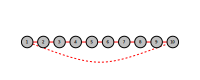

In [31]:
n = map(x->[x], 1:10)
s = [(i,(i%10)+1,1) for i ∈ 1:10]
netplot(n, s, svg_args=(20cm, 8cm), whitespace=0.1, layer_name=["" for i ∈ 1:10])

## all neurons in one layer (and save SVG to disk)

In [32]:
using Plots
n = [1:10]
s = [(i,(i%10)+1,1) for i ∈ 1:10]
netplot(n, s, svg_args=("test.svg", 8cm, 20cm), layer_name=[""]);

Load the SVG from disk and display it:

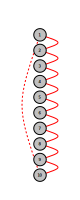

In [33]:
open("test.svg") do f
   display("image/svg+xml", readstring(f))
end

# A slightly more involved example

In [1]:
using NetPlot, Measures

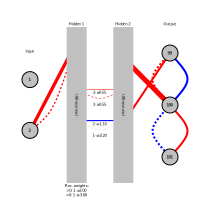

In [2]:
# Define nodes
n = [[1, 2], 3:50, 51:98, [99, 100, 101]]

# Define synaptic connections
s = [(2, 7, 3.3), 
    (7, 2, 1.3),
    (20, 60, 0.1),
    (30, 70, 1.0),
    (25, 65, -0.2),
    (35, 75, -2.0),
    (60, 20, 0.1),
    (70, 30, 1.0),
    (65, 25, -0.2),
    (30, 40, -3),
    (40, 30, 2), 
    (60, 100, 5),
    (80, 99, 2),
    (100, 99, 2),
    (99, 100, -2),
    (100, 101, 2),
    (101, 100, -2)]

# Plot the network
netplot(n, s, svg_args=(20cm, 20cm), layer_name=["Input", "Hidden 1", "Hidden 2", "Output"])

# An actual example I encountered at work using my AdaptiveNet package

In [ ]:
using AdaptiveNet, Distributions

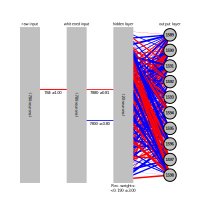

In [4]:
AdaptiveNet.init()
activation_dist = LogNormal{Float32}(0.0f0, 1.0f0)#Weibull{Float32}(2.0f0, 1.0f0)
num_inputs = 28^2
num_outputs = 10
num_neurons_1, num_neurons_2 = (num_inputs, 20)
input_buffer = zeros(Float32, num_inputs)
output_buffer = zeros(Float32, num_outputs)
nparams_input = (200.0f0, [[0.1f0, 0.1f0]], 0.0f0, [[0.5f0, 0.2f0]])
nparams_hidden = (200.0f0, [[0.1f0, 0.1f0]], 0.0f0, [[0.0f0, 1.0f0]])

sparams_ff = (0.005f0, 1.0f0, :noclip)
sparams_lat = (0.01f0, -3.0f0, :clipnegative)

# Create layers
l_0 = Layer(BufferNode, [input_buffer], 1:num_inputs)
l_1 = Layer(AdaptiveNeuron, nparams_input...,  Beta{Float32}(0.5f0, 0.5f0), Uniform{Float32}(-0.5f0, 0.5f0),       num_neurons=num_neurons_1)
l_2 = Layer(AdaptiveNeuron, nparams_hidden..., Normal{Float32}(0.0f0, 1.0f0), activation_dist, num_neurons=num_neurons_2)
l_3 = Layer(BufferNode, [output_buffer], 1:num_outputs)

# Create synaptic feed-forward connections
w_1_0 = eye(Float32, num_inputs)
s_1_0 = Synapses(l_0, l_1, FixedSynapse, w_1_0.!=0, w_1_0)
s_2_1 = Synapses(l_1, l_2, HebbianSynapse, 1, randn(Float32, num_neurons_2, num_neurons_1), sparams_ff...)
s_3_2 = Synapses(l_2, l_3, HebbianSynapse, 1, randn(Float32, num_outputs, num_neurons_2), sparams_ff...)

# Create lateral connections
# s_2_2 = Synapses(l_2, l_2, FixedSynapse, tril(ones(Bool, num_neurons_2, num_neurons_2), -1), -3.0f0)
s_2_2 = Synapses(l_2, l_2, HebbianSynapse, tril(ones(Bool, num_neurons_2, num_neurons_2), -1), -3.0f0, sparams_lat...)

# Generate network
net = Network([l_0, l_1, l_2, l_3], [s_1_0, s_2_1, s_3_2, s_2_2])
netplot(net, svg_args=(20cm, 20cm), layer_name=["raw input", "whitened input", "hidden layer", "output layer"])